# Importing libraries

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Downloading and loading dataset

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train, batch_size=8,
                                          shuffle=True, num_workers=2)

test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

test_loader = torch.utils.data.DataLoader(test, batch_size=8,
                                         shuffle=False, num_workers=2)

classes_names = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# Exploring dataset

In [5]:
data_iterator = iter(train_loader)
images, classes = data_iterator.next()

In [6]:
images[0].shape

torch.Size([3, 32, 32])

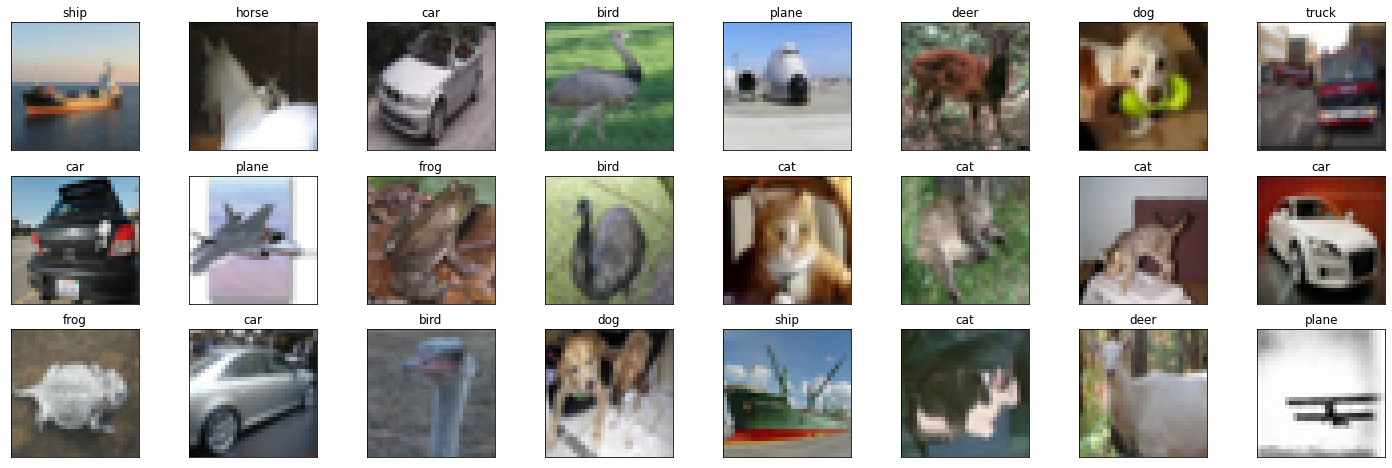

In [7]:
fig = plt.figure(figsize=(25, 8))

def show_image(image):
    image = image / 2 + 0.5
    image = image.numpy()
    plt.imshow(np.transpose(image, (1, 2, 0)))

n_row = 3
batch_size = 8

for row_idx in np.arange(n_row):
    images, classes = data_iterator.next()
    for idx in np.arange(batch_size):
      ax = fig.add_subplot(n_row, batch_size, batch_size*row_idx+idx+1, xticks=[], yticks=[])
      show_image(images[idx])
      ax.set_title(classes_names[classes[idx]])

# Simple CNN

In [96]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 3, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(3, 9, 3)
        self.fc1 = nn.Linear(9 * 6 * 6, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 9 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x




In [97]:
cnn = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)

In [98]:
for epoch in range(20):

    # actual_loss = 0.0
    for i, data in enumerate(train_loader, 0):

        inputs, labels = data
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        # actual_loss += loss.item()
        # if i % 2000 == 1999:    # print every 2000 mini-batches
        #     print('[%d, %5d] loss: %.3f' %
        #           (epoch + 1, i + 1, actual_loss / 2000))
        #     actual_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = cnn(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

print('Finished Training')

Accuracy of the network on the 10000 test images: 40 %
Accuracy of the network on the 10000 test images: 47 %
Accuracy of the network on the 10000 test images: 51 %
Accuracy of the network on the 10000 test images: 53 %
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 58 %
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 59 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 59 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 59 %
Accuracy of the network on the 10000 test images: 59 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 59 %
Accuracy o